In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from prettytable import PrettyTable as ptbl

ModuleNotFoundError: No module named 'prettytable'

In [16]:
def JacobiMethod(a,x,B,N,E):
    
    # Copying input arguments into local arguments to avoid data Over-writing
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)

    print("\n***** Jacobi Method *****")
    condition = True
    
    count = 0
    
    # List to hold column titles for Making table
    lst = []
    lst.append('Iteration')
    for i in range(n):
        lst.append('x'+str(i+1))
    
    # List to hold data which is to be displayed in table
    outputlist=[]

    # List to hold data which is to be used to plot graph i.e. iteration count and corresponding accuracy
    accuracy = []

    while condition:

        X_new = np.zeros((n))
        for i in range(n):
            tmp = 0
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
            X_new[i] = (b[i] - tmp)/A[i][i]
        
        print(f'Iteration = {count}',end="\t")

        temp = []
        temp.append(count+1)    
        for i in range(n):
            print(f'   x{i+1} = {X_new[i]:.6f}', end = "\t")
            temp.append(X_new[i])
        print()
        outputlist.append(temp)             # Adding data to outputlist (for making table)
        
        accuracyReached = abs(X_new[0] - X[0])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X[i])) 

        accuracy.append([count+1,accuracyReached])      # Adding data to accuracy list (for plotting graphs)
        
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True

    # Making Table and pushing data in it    
    table = ptbl(lst)
    for i in outputlist:
            table.add_row(i)
    
    # Printing Result
    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]:.6f}', end = "\t")
    print()
    return accuracy,table

In [17]:
n = 3
A = np.array([[-10.,-8.,0.],
            [-8.,10.,-1.,],
            [0.,-1.,10.]
            ])

b = np.array([-6.,9.,28.])

# A = np.array([[3.,-1.,1.],
#             [-1.,3.,-1.],
#             [1.,-1.,3]
#             ])

# b = np.array([
#     [-1.],
#     [7.],
#     [-7.]
# ])

# initial Guesses
X = np.array([0.,0.,0.])

# Reading tolerable error
e = 0.0001

In [18]:
jacobi, table = JacobiMethod(A,X,b,n,e)
jacobi_count = []
jacobi_accuracy = []
for i in jacobi:
        jacobi_count.append(i[0])
        jacobi_accuracy.append(i[1])


***** Jacobi Method *****
Iteration = 0	   x1 = 0.600000	   x2 = 0.900000	   x3 = 2.800000	
Iteration = 1	   x1 = -0.120000	   x2 = 1.660000	   x3 = 2.890000	
Iteration = 2	   x1 = -0.728000	   x2 = 1.093000	   x3 = 2.966000	
Iteration = 3	   x1 = -0.274400	   x2 = 0.614200	   x3 = 2.909300	
Iteration = 4	   x1 = 0.108640	   x2 = 0.971410	   x3 = 2.861420	
Iteration = 5	   x1 = -0.177128	   x2 = 1.273054	   x3 = 2.897141	
Iteration = 6	   x1 = -0.418443	   x2 = 1.048012	   x3 = 2.927305	
Iteration = 7	   x1 = -0.238409	   x2 = 0.857976	   x3 = 2.904801	
Iteration = 8	   x1 = -0.086381	   x2 = 0.999753	   x3 = 2.885798	
Iteration = 9	   x1 = -0.199802	   x2 = 1.119475	   x3 = 2.899975	
Iteration = 10	   x1 = -0.295580	   x2 = 1.030156	   x3 = 2.911948	
Iteration = 11	   x1 = -0.224125	   x2 = 0.954731	   x3 = 2.903016	
Iteration = 12	   x1 = -0.163785	   x2 = 1.011002	   x3 = 2.895473	
Iteration = 13	   x1 = -0.208801	   x2 = 1.058520	   x3 = 2.901100	
Iteration = 14	   x1 = -0.246816	

In [19]:
print(table)

+-----------+----------------------+--------------------+--------------------+
| Iteration |          x1          |         x2         |         x3         |
+-----------+----------------------+--------------------+--------------------+
|     1     |         0.6          |        0.9         |        2.8         |
|     2     | -0.12000000000000002 | 1.6600000000000001 | 2.8899999999999997 |
|     3     | -0.7280000000000001  |       1.093        |       2.966        |
|     4     |       -0.2744        |       0.6142       |       2.9093       |
|     5     | 0.10864000000000003  |      0.97141       |      2.86142       |
|     6     |      -0.177128       |      1.273054      |      2.897141      |
|     7     | -0.4184431999999999  |     1.0480117      |     2.9273054      |
|     8     |     -0.23840936      | 0.8579759800000002 |     2.90480117     |
|     9     | -0.08638078400000015 |    0.999752629     |    2.885797598     |
|     10    | -0.19980210319999997 | 1.1194751325999

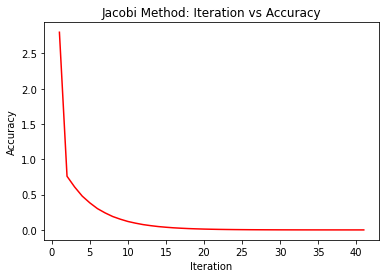

In [20]:
plt.title("Jacobi Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(jacobi_count,jacobi_accuracy,color = 'red')
plt.show()